In [2]:
#Tuning a Random Forest

<Axes: >

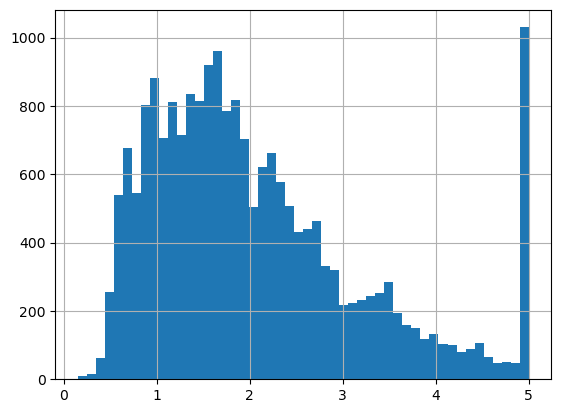

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()

X = cali_housing.data
y = cali_housing.target

pd.Series((y)).hist(bins=50)

<Axes: >

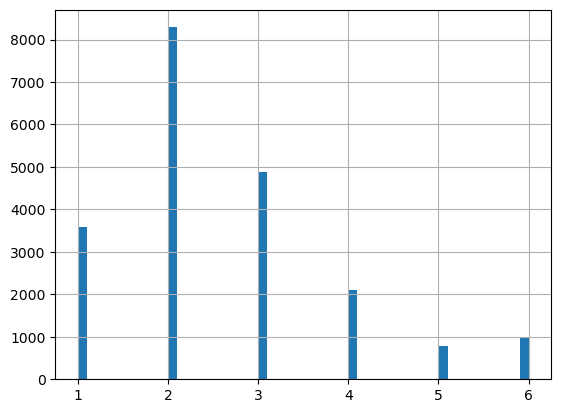

In [6]:
bins = np.arange(6)
binned_y = np.digitize(y, bins)
pd.Series(binned_y).hist(bins=50)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [10]:
from sklearn.ensemble import RandomForestRegressor

rft = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['sqrt','log2',1.0],
 'min_samples_leaf': [1,2,7,11],
 'n_estimators': [50]
 }

pre_gs_inst = GridSearchCV(rft, param_grid = param_grid,cv=3) #changed from cv=10 to speed up computation

pre_gs_inst.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['sqrt', 'log2', 1.0],
                         'min_samples_leaf': [1, 2, 7, 11],
                         'n_estimators': [50]})

In [5]:
pre_gs_inst.best_params_

{'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 50}

In [7]:
rs_rft = RandomForestRegressor(**{'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 1000})

rs_rft.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
rs_rft.score(X_test, y_test)

0.82099515511365539

In [9]:
y_pred = rs_rft.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.82099515511365539

In [10]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.32253091494598596

In [11]:
res_dict = pre_gs_inst.cv_results_

results_df = pd.DataFrame()
for key in res_dict.keys():
     results_df[key] = res_dict[key]

In [12]:
param_cols = [x for x in results_df.columns if 'param' in x and x is not 'params']
focus_cols = param_cols + ['mean_test_score']

results_df[focus_cols]

,param_min_samples_leaf,param_max_features,param_n_estimators,mean_test_score
0,1,sqrt,50,0.806128
1,2,sqrt,50,0.804887
2,7,sqrt,50,0.790066
3,11,sqrt,50,0.777692
4,1,log2,50,0.807654
5,2,log2,50,0.808955
6,7,log2,50,0.794156
7,11,log2,50,0.789136
8,1,1,50,0.793475
9,2,1,50,0.794628


In [13]:
for param in param_cols:
    for key,group in results_df.groupby(param):
        print (param, key, group['mean_test_score'].mean(),group['mean_test_score'].std())

('param_min_samples_leaf', 1, 0.8024192191191825, 0.007783241825132443)
('param_min_samples_leaf', 2, 0.8028235325041541, 0.00738317306417046)
('param_min_samples_leaf', 7, 0.7902980290838647, 0.003747006566392743)
('param_min_samples_leaf', 11, 0.7822471901387741, 0.006068451223665355)
('param_max_features', 1.0, 0.7886721884221682, 0.006813342986028812)
('param_max_features', 'log2', 0.7999754116227418, 0.009848313094719365)
('param_max_features', 'sqrt', 0.7946933780895719, 0.013479682396875855)
('param_n_estimators', 50, 0.794446992711494, 0.010579689791395532)


In [14]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_features' : ['sqrt','log2',1.0], 
 'min_samples_leaf' : [1, 2, 3, 7, 11],
 'n_estimators': [50, 100],
 'oob_score': [True, False]}

pre_gs_inst = RandomizedSearchCV(RandomForestRegressor(warm_start=True), 
 param_distributions = param_dist,
 cv=3, 
 n_iter = 15)

pre_gs_inst.fit(X_train, y_train)

sorted(pre_gs_inst.grid_scores_, key = lambda x:x.mean_validation_score, reverse = True)

C:\Users\jdavila\Anaconda27\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80813, std: 0.00630, params: {'n_estimators': 100, 'max_features': 'sqrt', 'oob_score': True, 'min_samples_leaf': 2},
 mean: 0.80653, std: 0.00757, params: {'n_estimators': 50, 'max_features': 'log2', 'oob_score': True, 'min_samples_leaf': 1},
 mean: 0.80570, std: 0.00536, params: {'n_estimators': 50, 'max_features': 'sqrt', 'oob_score': True, 'min_samples_leaf': 2},
 mean: 0.80425, std: 0.00839, params: {'n_estimators': 100, 'max_features': 'sqrt', 'oob_score': True, 'min_samples_leaf': 3},
 mean: 0.79684, std: 0.00838, params: {'n_estimators': 100, 'max_features': 'log2', 'oob_score': False, 'min_samples_leaf': 7},
 mean: 0.79654, std: 0.00659, params: {'n_estimators': 50, 'max_features': 'log2', 'oob_score': True, 'min_samples_leaf': 7},
 mean: 0.79496, std: 0.01147, params: {'n_estimators': 50, 'max_features': 1.0, 'oob_score': True, 'min_samples_leaf': 2},
 mean: 0.79345, std: 0.01063, params: {'n_estimators': 50, 'max_features': 1.0, 'oob_score': True, 'min_samples_leaf'

In [15]:
rs_rft = RandomForestRegressor(n_jobs=-1, warm_start=True,
 max_features = 'sqrt',
 min_samples_leaf = 2,
 oob_score = True,
 n_estimators = 1000)
rs_rft.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=True)

In [16]:
y_pred = rs_rft.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.81772579447544591

In [17]:
y_pred = rs_rft.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

print "R-squared",r2_score(y_test, y_pred)
print "MAE : ",mean_absolute_error(y_test, y_pred)
print "MAPE : ",(np.abs(y_test - y_pred)/y_test).mean()

R-squared 0.817725794475
MAE :  0.330175719471
MAPE :  0.188636567659


In [18]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV


param_dist = {'max_features' : ['sqrt','log2',1.0],
'min_samples_leaf' : [1, 2, 3, 7, 11],
'n_estimators': [50, 100],
'oob_score': [True, False]}

pre_gs_inst = RandomizedSearchCV(ExtraTreesRegressor(warm_start=True,bootstrap=True),
param_distributions = param_dist,
cv=3,
n_iter = 15)

pre_gs_inst.fit(X_train, y_train)

pre_gs_inst.best_params_

{'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 50,
 'oob_score': False}

In [19]:
import copy

extra_best_params = copy.deepcopy(pre_gs_inst.best_params_)

extra_best_params['n_estimators'] = 1000
extra_best_params['warm_start'] = True
extra_best_params['bootstrap'] = True

rs_etr = ExtraTreesRegressor(**extra_best_params)

In [20]:
rs_etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='log2', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=True)

In [21]:
y_pred = rs_etr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.81995468995123055

In [22]:
y_pred = rs_etr.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

print "R-squared",r2_score(y_test, y_pred)
print "MAE : ",mean_absolute_error(y_test, y_pred)
print "MAPE : ",(np.abs(y_test - y_pred)/y_test).mean()

R-squared 0.819954689951
MAE :  0.326634543909
MAPE :  0.184605707508


In [ ]:
#In Linux command line: install pyearth
git clone git://github.com/scikit-learn-contrib/py-earth.git
cd py-earth
sudo python setup.py install

In [ ]:
from pyearth import Earth
earth_model = Earth().fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = earth_model.predict(X_test)
r2_score(y_test, y_pred)

# 0.70532965099191069  #: In Linux

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import BayesianRidge
earth_pipeline = Pipeline([('earth', Earth()), ('br',BayesianRidge())]).fit(X_train, y_train)
y_pred = earth_pipeline.predict(X_test)
r2_score(y_test, y_pred)
# 0.70538218833022714  #: In Linux